In [1]:
%config completer.use_jedi = False

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
#load the dataset
LoadDataset=pd.read_csv('Data/loan_data_2007_2014.csv')

#create a copy of original dataset so that orginal dataframe is not disturbed
Load_DS=LoadDataset.copy()

Load_DS
#print the basic info of the dataframe
Load_DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

# PRE-PROCESING

#### Data Cleaning

In [3]:
#check the emp-length column unique values
Load_DS['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [4]:
#replace/remove the extra characters/words 
Load_DS['emp_length_int']=Load_DS['emp_length'].str.replace('[<+ years year]','')

#convert it into numrical format and check the type of emp_length_int
Load_DS['emp_length_int'] = pd.to_numeric(Load_DS['emp_length_int'])
type(Load_DS['emp_length_int'][0])

numpy.float64

In [5]:
Load_DS['emp_length_int'].unique()

array([10.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [6]:
#print the dataframe
Load_DS

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN,4.0
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN,10.0
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN,7.0
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN,3.0


In [7]:
#check the unique values of term column
Load_DS['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [8]:
#do all the necesaary replacements to convert into numeric
Load_DS['term_int']=Load_DS['term'].str.replace('[ months]','')

In [9]:
#convert it into numrical format & check the type
Load_DS['term_int']= pd.to_numeric(Load_DS['term_int'])

type(Load_DS['term_int'][0])

numpy.int64

In [10]:
Load_DS['term_int'].describe()

count    466285.000000
mean         42.605334
std          10.719040
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term_int, dtype: float64

In [11]:
#check the values for called earliest_cr_line column- the month the borrower's has been assigned the loan
Load_DS['earliest_cr_line'].unique()

array(['Jan-85', 'Apr-99', 'Nov-01', 'Feb-96', 'Jan-96', 'Nov-04',
       'Jul-05', 'Jan-07', 'Apr-04', 'Sep-04', 'Jan-98', 'Oct-89',
       'Jul-03', 'May-91', 'Sep-07', 'Oct-98', 'Aug-93', 'Oct-03',
       'Jan-01', 'Nov-97', 'Feb-83', 'Jul-85', 'Apr-03', 'Jun-01',
       'Feb-02', 'Aug-84', 'Nov-06', 'Dec-87', 'Nov-81', 'Feb-97',
       'Apr-05', 'Oct-07', 'Dec-00', 'Apr-07', 'Dec-01', 'Jan-03',
       'Mar-94', 'Sep-98', 'Jun-04', 'Nov-95', 'Jul-99', 'Jun-95',
       'Sep-92', 'Jan-02', 'Apr-92', 'Oct-06', 'May-00', 'Dec-98',
       'Dec-04', 'Oct-00', 'May-02', 'May-06', 'Jul-02', 'Jul-06',
       'May-97', 'Oct-05', 'Apr-95', 'Oct-02', 'Jan-00', 'Apr-00',
       'Dec-94', 'Sep-05', 'Dec-84', 'Dec-99', 'Nov-03', 'Jun-89',
       'Jun-03', 'Oct-96', 'May-03', 'Jun-02', 'Jun-07', 'Dec-96',
       'Feb-84', 'Sep-02', 'Jan-86', 'May-98', 'Jan-97', 'Jun-05',
       'Feb-90', 'Mar-04', 'Jul-95', 'Aug-94', 'Jun-92', 'Mar-97',
       'Apr-06', 'Apr-90', 'Aug-99', 'Sep-00', 'Feb-01', 'Dec-

In [12]:
#convert into datetime format and check the values
Load_DS['earliest_cr_line_date']=pd.to_datetime(Load_DS['earliest_cr_line'], format='%b-%y')
Load_DS['earliest_cr_line_date']

0        1985-01-01
1        1999-04-01
2        2001-11-01
3        1996-02-01
4        1996-01-01
            ...    
466280   2003-04-01
466281   1997-06-01
466282   2001-12-01
466283   2003-02-01
466284   2000-02-01
Name: earliest_cr_line_date, Length: 466285, dtype: datetime64[ns]

In [13]:
from datetime import date

#get the total number of days from current date i.e present date
pd.to_datetime(date.today())-Load_DS['earliest_cr_line_date']

0        14108 days
1         8905 days
2         7960 days
3        10060 days
4        10091 days
            ...    
466280    7444 days
466281    9574 days
466282    7930 days
466283    7503 days
466284    8599 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [14]:
#convert these days into months i.e converting days into months
Load_DS['mths_since_earliest_cr_line'] = round(
    pd.to_numeric((pd.to_datetime(date.today())-Load_DS['earliest_cr_line_date'])/np.timedelta64(1,'M'))
)

In [15]:
#check the basic statistics of 'mths_since_earliest_cr_line'
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        308.465435
std          93.975801
min        -543.000000
25%         252.000000
50%         294.000000
75%         354.000000
max         656.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [16]:
#check the dataframe for column that have negitive months which is not possible
Load_DS.loc[: , ['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][Load_DS['mths_since_earliest_cr_line']<0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-468.0
1770,Sep-68,2068-09-01,-540.0
2799,Sep-64,2064-09-01,-492.0
3282,Sep-67,2067-09-01,-528.0
3359,Feb-65,2065-02-01,-498.0
...,...,...,...
464003,Jan-68,2068-01-01,-532.0
464260,Jul-66,2066-07-01,-514.0
465100,Oct-67,2067-10-01,-529.0
465500,Sep-67,2067-09-01,-528.0


Upon analyzing the negative values in column 'mths_since_earliest_cr_line' we can see that for those data points dates are provided far in the future. In this scenario we get an info from business as per what can be done here. 
As of now we will replace t he negative values with the maximumm no. of months since earliest credit line was opened(considering that it was supposed to be in 1990s and not 2000s)

In [17]:
#replace all the negitive values  with the max months value
Load_DS['mths_since_earliest_cr_line'][Load_DS['mths_since_earliest_cr_line'] < 0 ]= Load_DS['mths_since_earliest_cr_line'].max()

In [18]:
#again check the basic stats so that no months are negitive
Load_DS['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        311.368504
std          86.460790
min         142.000000
25%         253.000000
50%         295.000000
75%         354.000000
max         656.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [19]:
#chekc the issue_d column
Load_DS['issue_d']

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [20]:
#convert into date_time format
Load_DS['issue_date']= pd.to_datetime(Load_DS['issue_d'], format='%b-%y')

In [21]:
#convert days to months
Load_DS['months_since_issue_date']=round(
    pd.to_numeric((pd.to_datetime(date.today())-Load_DS['issue_date'])/np.timedelta64(1,'M'))
)

In [22]:
#check the basic stats
Load_DS['months_since_issue_date'].describe()

count    466285.000000
mean        120.205578
std          14.343699
min         105.000000
25%         110.000000
50%         116.000000
75%         126.000000
max         195.000000
Name: months_since_issue_date, dtype: float64

#### Preprocessing Categorical Data

In [23]:
#Get the dummies value for the column 'grade',,,apply a (prefix='grade') and (prefix_sep=":")
pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [24]:
#Similarly apply the dummy creation step for 'grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status' in one list_comprehension
Load_dumies_Data=[pd.get_dummies(Load_DS['grade'],prefix='grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['sub_grade'],prefix='sub_grade',prefix_sep=':'),
                 pd.get_dummies(Load_DS['home_ownership'],prefix='home_ownership',prefix_sep=':'),
                 pd.get_dummies(Load_DS['verification_status'],prefix='verification_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['loan_status'],prefix='loan_status',prefix_sep=':'),
                 pd.get_dummies(Load_DS['purpose'],prefix='purpose',prefix_sep=':'),
                 pd.get_dummies(Load_DS['addr_state'],prefix='addr_state',prefix_sep=':'),
                 pd.get_dummies(Load_DS['initial_list_status'],prefix='initial_list_status',prefix_sep=':')]
                 
                 
                 
Load_dumies_Data[1].head(5)                 
                                                                                                         

,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,...,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#concat all elements in the list and create a dataframe
Load_dumies_Data=pd.concat(Load_dumies_Data, axis=1)

#check the dummy var dataframe
Load_dumies_Data

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466282,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
466283,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
#conact this dummy var dataframe with the original Load_DS dataframe
Load_DS=pd.concat([Load_DS,Load_dumies_Data], axis=1)

In [27]:
#check the column names
Load_DS.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

##### Missing Values imputation

In [28]:
pd.options.display.max_rows = None

#check for missing values and print the sum of all null values of all columns
Load_DS.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [29]:
#CHeck the null values for Total revenue high credit limit column and 
#replace them with vlaues in funded_amount column in our data set
Load_DS['total_rev_hi_lim'].fillna(Load_DS['funded_amnt'], inplace = True)

#Check the null values post filling
Load_DS['total_rev_hi_lim'].isna().sum()

0

In [30]:
pd.options.display.max_rows =100

In [31]:
#similarly fill the 'annual_inc' null values with mean value of 'annual_inc' column
Load_DS['annual_inc'].fillna(Load_DS['annual_inc'].mean(), inplace = True)

#Check the null values post filling
Load_DS['annual_inc'].isnull().sum()

0

In [32]:
#fill all null values in column 'mths_since_earliest_cr_line',acc_now_delinq, total_acc,
# pub_rec, open_acc, inq_last_6mths, delinq_2yrs,emp_length_int with '0'
Load_DS['mths_since_earliest_cr_line'].fillna('0', inplace = True)
Load_DS['acc_now_delinq'].fillna('0', inplace = True)
Load_DS['total_acc'].fillna('0', inplace = True)
Load_DS['pub_rec'].fillna('0',inplace=True)
Load_DS['open_acc'].fillna('0',inplace=True)
Load_DS['inq_last_6mths'].fillna('0',inplace=True)
Load_DS['delinq_2yrs'].fillna('0',inplace=True)
Load_DS['emp_length_int'].fillna('0',inplace=True)

In [33]:
#check the null values in the dataset again
Load_DS['inq_last_6mths'].isnull().sum()

0

##### PD(PROBABLITY OF DEFAULT)
- analyzing the probability that the customer who has taken the loan will not pay the loan o time 

Building the Weight of expetency values

In [34]:
#check the unique values in our final output column i.e 'loan_status'
Load_DS['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [35]:
#chekc the value_counts for loan_status
Load_DS['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [36]:
#check the percentage of distribution
Load_DS['loan_status'].value_counts()/Load_DS['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

Binary encoding of our target variable replacing 'Fully paid','Current', 
'Does not meet the credit policy. Status:Fully Paid, Late (16-30 days)' with 1 and rest with 0

In [37]:
#Binary encoding of our target variable
Load_DS['good_bad']=np.where(Load_DS['loan_status'].isin(
    ['Charged Off','Default','Does not meet the credit policy. Status:Charged Off','Late (31-120 days)']
),0,1)

In [38]:
X = Load_DS.drop('good_bad', axis = 1)
y = Load_DS['good_bad']

In [39]:
#import train-test split
from sklearn.model_selection import train_test_split

In [40]:
#applying the train_test split
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.2,random_state=1)

In [41]:
#check the shape of training and testing dataset:
display(X_train.shape, y_train.shape)
display(X_test.shape, y_test.shape)

(373028, 207)

(373028,)

(93257, 207)

(93257,)

### DATA PREPARATION

In [42]:
#Data prepartion to build the score-card:
df_inputs_prepr = X_train
df_targets_prepr = y_train

In [43]:
#check the unique values for 'grade' column
df_inputs_prepr['grade'].unique()

array(['B', 'C', 'F', 'A', 'D', 'E', 'G'], dtype=object)

In [44]:
#concat grade with df_target_prepr col and create a dataframe
df1= pd.concat([df_inputs_prepr['grade'], df_targets_prepr],axis=1)
df1

,grade,good_bad
403678,B,1
241492,C,1
15864,C,0
320277,C,1
299829,B,1
...,...,...
73349,G,1
371403,E,1
312201,A,1
267336,C,1


In [45]:
#check number of records in each grade
records_per_grade = df1.groupby('grade', as_index = False).count()
records_per_grade

,grade,good_bad
0,A,59962
1,B,109582
2,C,100255
3,D,61390
4,E,28602
5,F,10581
6,G,2656


In [46]:
#get the mean of the number of records i.e here we will get only for good loans only that has binary value as '1'
good_loan_per_grade = df1.groupby('grade',as_index=False).mean()

In [47]:
#create a dataframe that has the number of records and mean records for grade
df1=pd.concat([df1.groupby('grade',as_index=False).count(),
             df1.groupby('grade',as_index=False).mean()], join = 'inner' ,axis=1)

In [48]:
#print df1
df1

,grade,good_bad,grade,good_bad
0,A,59962,A,0.961759
1,B,109582,B,0.921109
2,C,100255,C,0.885093
3,D,61390,D,0.846506
4,E,28602,E,0.805958
5,F,10581,F,0.762026
6,G,2656,G,0.721009


In [49]:
#remove the grade column as it is twice
df1 = df1.iloc[:,[0,1,3]]
df1

,grade,good_bad,good_bad
0,A,59962,0.961759
1,B,109582,0.921109
2,C,100255,0.885093
3,D,61390,0.846506
4,E,28602,0.805958
5,F,10581,0.762026
6,G,2656,0.721009


In [50]:
#replacing the column names to make it more representable
df1.columns=[df1.columns.values[0],'n_obs','prop_good']

In [51]:
df1


,grade,n_obs,prop_good
0,A,59962,0.961759
1,B,109582,0.921109
2,C,100255,0.885093
3,D,61390,0.846506
4,E,28602,0.805958
5,F,10581,0.762026
6,G,2656,0.721009


In [52]:
#get the proportion of n_obs- no. of observations for each grade/total no. of observations
df1['prop_n_obs']=df1['n_obs']/df1['n_obs'].sum()

In [53]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,59962,0.961759,0.160744
1,B,109582,0.921109,0.293763
2,C,100255,0.885093,0.268760
3,D,61390,0.846506,0.164572
4,E,28602,0.805958,0.076675
5,F,10581,0.762026,0.028365
6,G,2656,0.721009,0.007120


In [54]:
#calculating the number of good varriables and bad varrirables

df1['n_good']=df1['prop_good']*df1['n_obs']
df1['n_bad']=(1-df1['prop_good'])*df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,59962,0.961759,0.160744,57669.0,2293.0
1,B,109582,0.921109,0.293763,100937.0,8645.0
2,C,100255,0.885093,0.268760,88735.0,11520.0
3,D,61390,0.846506,0.164572,51967.0,9423.0
4,E,28602,0.805958,0.076675,23052.0,5550.0
5,F,10581,0.762026,0.028365,8063.0,2518.0
6,G,2656,0.721009,0.007120,1915.0,741.0


In [55]:
#check the density of good and bad variables
df1['prop_n_good']=df1['n_good']/df1['n_good'].sum()
df1['prop_n_bad']=df1['n_bad']/df1['n_good'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900
1,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013
2,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354
4,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700
5,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577
6,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230


In [56]:
#calculate the Weight of Evidence(WOE) = In(% of good-events ➗ % of bad-events)

df1['WoE']=np.log(df1['prop_n_good']/df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900,3.224859
1,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013,2.457515
2,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664,2.041570
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354,1.707455
4,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700,1.423955
5,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577,1.163821
6,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230,0.949472


In [57]:
#reset the index of the df1 dataframe and sort the values according to WoE
df1= df1.sort_values(['WoE'])
df1=df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230,0.949472
1,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577,1.163821
2,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700,1.423955
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354,1.707455
4,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664,2.041570
5,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013,2.457515
6,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900,3.224859


In [58]:
#calculate the (absolulute) difference for prop_good and WoE columns(for each row) in order to evaluate IV:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE']=df1['WoE'].diff().abs()

In [59]:
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE
0,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230,0.949472,NaN,NaN
1,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577,1.163821,0.041017,0.214348
2,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700,1.423955,0.043931,0.260134
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354,1.707455,0.040548,0.283501
4,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664,2.041570,0.038587,0.334114
5,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013,2.457515,0.036016,0.415946
6,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900,3.224859,0.040650,0.767343


In [60]:
#calculate the IV:implied volatility(which will tell us how much we can rely on WOE)

df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad'])*df1['WoE']
df1['IV']=df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230,0.949472,NaN,NaN,2.010485
1,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577,1.163821,0.041017,0.214348,2.010485
2,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700,1.423955,0.043931,0.260134,2.010485
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354,1.707455,0.040548,0.283501,2.010485
4,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664,2.041570,0.038587,0.334114,2.010485
5,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013,2.457515,0.036016,0.415946,2.010485
6,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900,3.224859,0.040650,0.767343,2.010485


In [61]:
#Creating a function for the the data prepation steps to calculate WoE & IV

def woe_discrete(df,categorical_variable_name,good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[discrete_variable_name,'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    #df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['WoE'] = np.where(df['prop_n_bad'] != 0,np.log(df['prop_n_good']/df['prop_n_bad']),0)  #handle divide by 0 values
    df= df.sort_values(['WoE'])
    df=df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])*df['WoE']
    df['IV']=df['IV'].sum()
    return df

In [62]:
#applying the function on 'grade' column:
df_temp = woe_discrete(X_train, 'grade', y_train)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2656,0.721009,0.007120,1915.0,741.0,0.005762,0.002230,0.949472,NaN,NaN,2.010485
1,F,10581,0.762026,0.028365,8063.0,2518.0,0.024261,0.007577,1.163821,0.041017,0.214348,2.010485
2,E,28602,0.805958,0.076675,23052.0,5550.0,0.069363,0.016700,1.423955,0.043931,0.260134,2.010485
3,D,61390,0.846506,0.164572,51967.0,9423.0,0.156368,0.028354,1.707455,0.040548,0.283501,2.010485
4,C,100255,0.885093,0.268760,88735.0,11520.0,0.267002,0.034664,2.041570,0.038587,0.334114,2.010485
5,B,109582,0.921109,0.293763,100937.0,8645.0,0.303718,0.026013,2.457515,0.036016,0.415946,2.010485
6,A,59962,0.961759,0.160744,57669.0,2293.0,0.173525,0.006900,3.224859,0.040650,0.767343,2.010485


##### Visualizing Results

In [63]:
#import the visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [64]:
#function for plotting of WoE:

def plot_by_woe(df_WoE,rotation_of_x_axis_labels=0):
    x=np.array(df_WoE.iloc[:,0].apply(str))
    y=df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker = 'o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('weight of evidence')
    plt.title(str('Weight of Evidence by ')+df_WoE.columns[0])
    plt.xticks(rotation=rotation_of_x_axis_labels)

**High WoE means the borrower chance to pay the loan on time is high:**

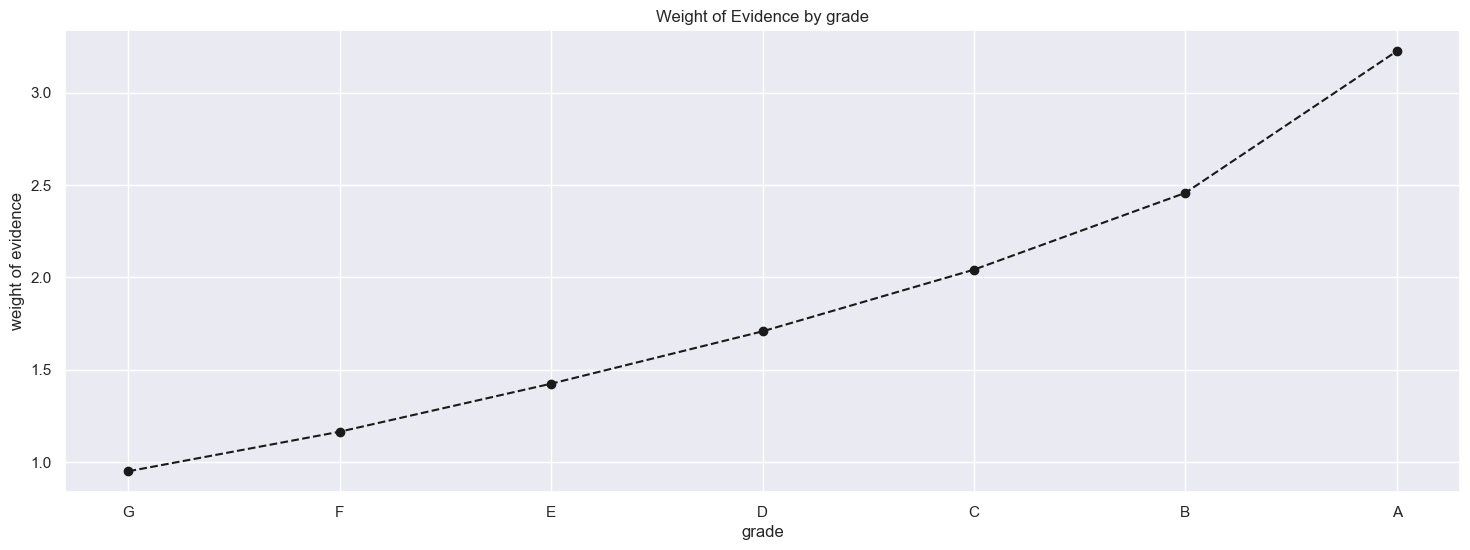

In [65]:
#pass the dataframe into the plot_by_woe function
plot_by_woe(df_temp)

Preprocessing Discrete Variables:Creating Dummy Variable,part1

In [66]:
#Check the WoE for 'home_ownership' and visualize the result using woe plot
df_temp_ho = woe_discrete(X_train, 'home_ownership', y_train)
df_temp_ho

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,0.000000,NaN,NaN,1.855124
1,OTHER,145,0.800000,0.000389,116.0,29.0,0.000349,0.000087,1.386294,0.200000,1.386294,1.855124
2,RENT,150727,0.874183,0.404064,131763.0,18964.0,0.396473,0.057062,1.938462,0.074183,0.552168,1.855124
3,NONE,40,0.875000,0.000107,35.0,5.0,0.000105,0.000015,1.945910,0.000817,0.007448,1.855124
4,OWN,33522,0.891444,0.089865,29883.0,3639.0,0.089917,0.010950,2.105581,0.016444,0.159671,1.855124
5,MORTGAGE,188593,0.904275,0.505573,170540.0,18053.0,0.513152,0.054321,2.245658,0.012831,0.140077,1.855124


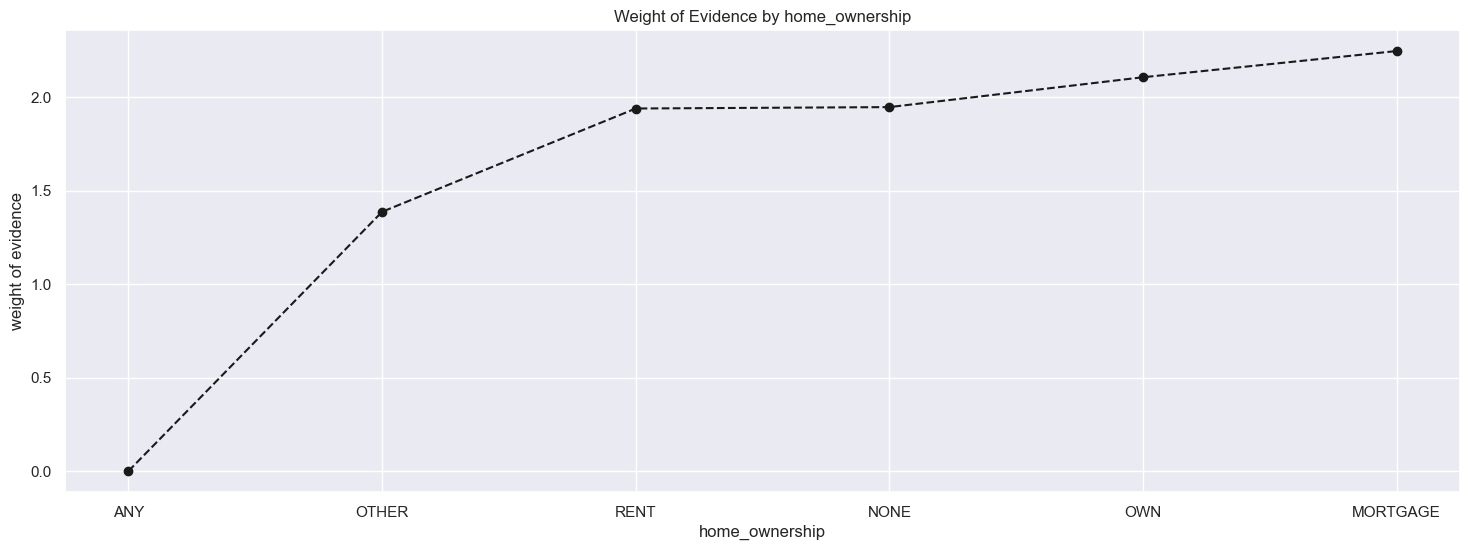

In [67]:
#plot the woe for 'home_ownersip'
plot_by_woe(df_temp_ho)

In [68]:
#add the binary values of values 'RENT','OTHER','NONE','ANY' as they have low WoE values
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],
                                                           df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

PREPROCESSING DISCRETE VARRIABLES:DUMMMY VARRIABLES

In [69]:
#check the unique values in addr_state(df_inputs_prepr = X_train)
df_inputs_prepr['addr_state'].unique()

array(['OK', 'CA', 'VA', 'OH', 'NC', 'MN', 'FL', 'TX', 'AL', 'NY', 'KY',
       'MI', 'GA', 'WA', 'NV', 'PA', 'SC', 'MD', 'SD', 'TN', 'NJ', 'NH',
       'IL', 'WI', 'AZ', 'MA', 'VT', 'RI', 'HI', 'LA', 'AK', 'MS', 'MT',
       'NM', 'KS', 'IN', 'CT', 'DE', 'OR', 'AR', 'MO', 'DC', 'CO', 'UT',
       'WV', 'WY', 'NE', 'ID', 'IA', 'ME'], dtype=object)

In [70]:
#apply the function woe_discrete on 'addr_state'
df_temp_as = woe_discrete(X_train, 'addr_state', y_train)
df_temp_as

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,13,0.384615,0.000035,5.0,8.0,0.000015,0.000024,-0.470004,NaN,NaN,1.850527
1,ME,3,1.000000,0.000008,3.0,0.0,0.000009,0.000000,0.000000,0.615385,0.470004,1.850527
2,IA,13,0.769231,0.000035,10.0,3.0,0.000030,0.000009,1.203973,0.230769,1.203973,1.850527
3,NV,5269,0.865060,0.014125,4558.0,711.0,0.013715,0.002139,1.857967,0.095829,0.653994,1.850527
4,HI,2005,0.868828,0.005375,1742.0,263.0,0.005242,0.000791,1.890635,0.003768,0.032668,1.850527
5,FL,25257,0.874926,0.067708,22098.0,3159.0,0.066493,0.009505,1.945232,0.006098,0.054596,1.850527
6,AL,4685,0.877481,0.012559,4111.0,574.0,0.012370,0.001727,1.968792,0.002556,0.023561,1.850527
7,RI,1613,0.880347,0.004324,1420.0,193.0,0.004273,0.000581,1.995722,0.002866,0.026930,1.850527
8,NM,2049,0.882870,0.005493,1809.0,240.0,0.005443,0.000722,2.019891,0.002523,0.024169,1.850527
9,NC,10172,0.883110,0.027269,8983.0,1189.0,0.027030,0.003578,2.022221,0.000241,0.002331,1.850527


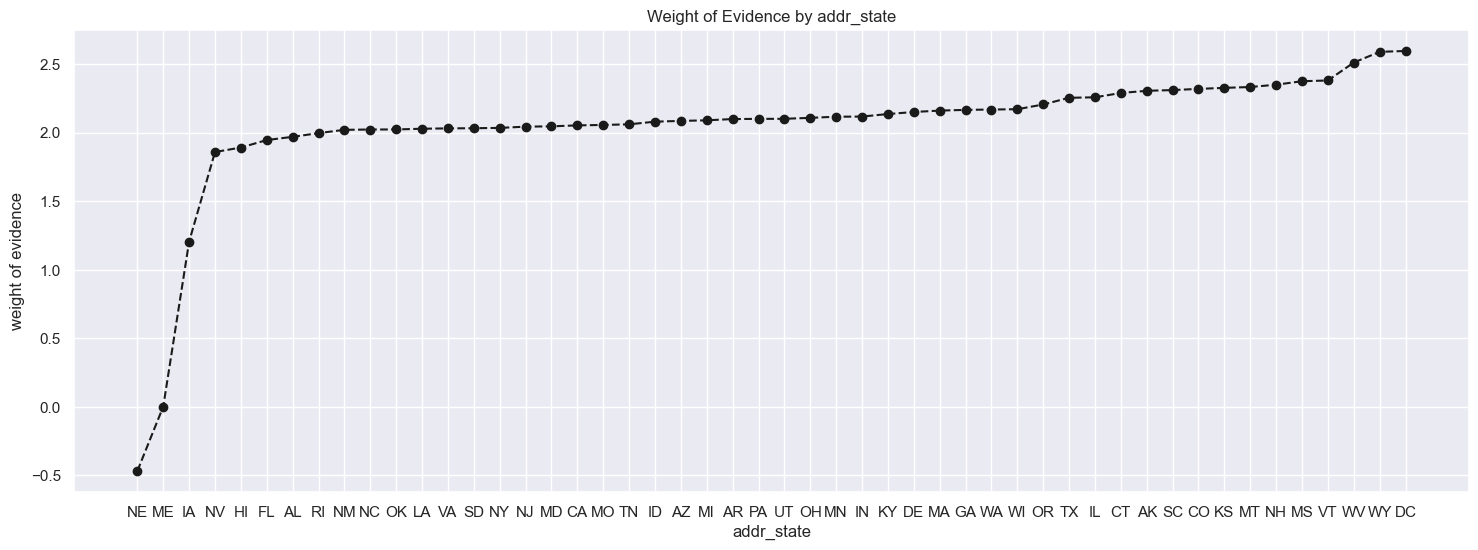

In [71]:
#plot the woe_plot
plot_by_woe(df_temp_as)

In [72]:
#adding the state 'ND' if it is not present in columns and make it zero if not present
# if['addr_state:ND'] in df_inputs_prepr.columns.values:
#     pass
# else:
#     df_inputs_prepr['addr_state:ND']=0

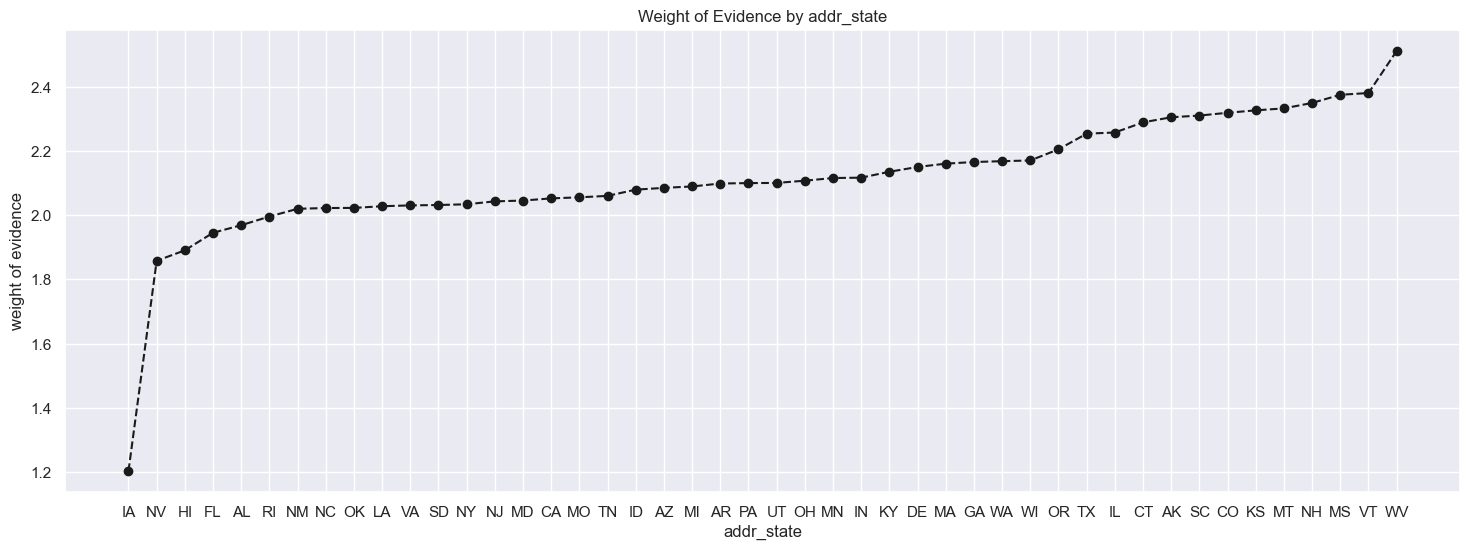

In [73]:
#plot the woe_plot from 2nd row- IA onwards for which we have significan WoE value
plot_by_woe(df_temp_as.iloc[2:-2,:])

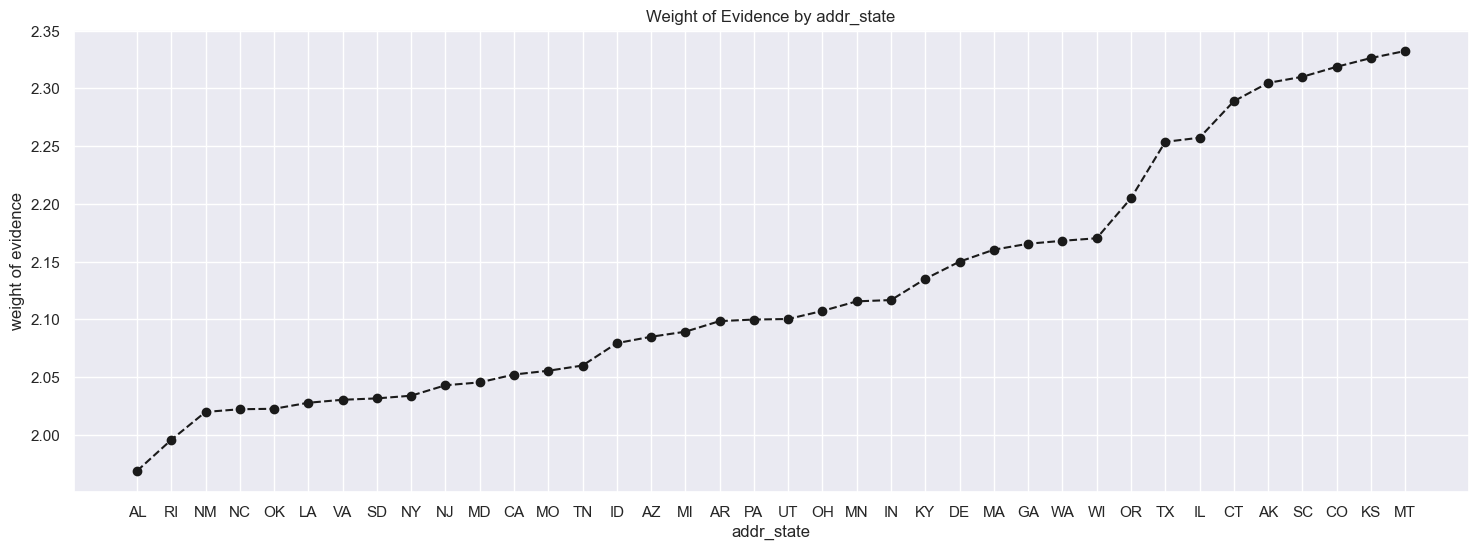

In [74]:
#woe_plot for values whose WoE values differs at large to get the clear picture
plot_by_woe(df_temp_as.iloc[6:-6,:])

In [75]:
# states_list = df_temp_as[df_temp_as['binned_values']== 16]['addr_state']#.astype(str))#transform(lambda x : '_'.join(x))
# state_col = ('addr_state:'+ (df_temp_as[df_temp_as['binned_values']== 16]['addr_state']).astype(str)).tolist()
# col_name = 'addr_state_'+ states_list.str.cat(sep='_')
# # len(state_col)
# # for state in np.arange(len(state_col)):
# #     val += [df_inputs_prepr[state_col]]
    
# #state_col
# df2 = pd.DataFrame()
# df2[col_name] = df_inputs_prepr[state_col].sum(axis = 1)

we have multiple states columns with different WoE values, let's make it simple and consolidate them as per similar WoE values by using the approach of binning

In [78]:
#create 10 bins
bins = np.linspace(df_temp_as['WoE'].min(),df_temp_as['WoE'].max(),20)
df_temp_as['binned_values'] = np.digitize(df_temp_as['WoE'].values, bins=bins)

#group states with similar WoE values
for i in np.arange(1,bins):
    if(not(df_temp_as[df_temp_as['binned_values']== i].empty)):
        #display(i) #checkpoint
        states_list = pd.Series() 
        all_col_name = []
        state_col =[]
        states_list = df_temp_as[df_temp_as['binned_values']== i]['addr_state'] #series object
        all_col_name = 'addr_state_'+ states_list.str.cat(sep='_')
        state_col = ('addr_state:'+ (df_temp_as[df_temp_as['binned_values']== i]['addr_state']).astype(str)).tolist()
        df_inputs_prepr[all_col_name] = df_inputs_prepr[state_col].sum(axis = 1)
        
df_inputs_prepr.head(10)        

1

3

11

15

16

17

18

19

In the above step we automated the process of grouping different states based on their WoE values, whereas in below step we have approaced it manual analysis

In [ ]:
#alternatively, we can simply add the WoE values for states with similar WoE values by checking manually


df_inputs_prepr['addr_state:ME_NE_IA_NC_FL_HI_AL']=sum([df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:NC'],
                                                       df_inputs_prepr['addr_state:FL'],df_inputs_prepr['addr_state:HI'], 
                                                       df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA']=sum([df_inputs_prepr['addr_state:NM'],df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC']=sum([df_inputs_prepr['addr_state:OK'],df_inputs_prepr['addr_state:TN'],
                                                       df_inputs_prepr['addr_state:MO'],df_inputs_prepr['addr_state:LA'],
                                                       df_inputs_prepr['addr_state:MD'],df_inputs_prepr['addr_state:NC']])


df_inputs_prepr['addr_state:UT_KY_AZ_NJ']=sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:KY'],
                                                       df_inputs_prepr['addr_state:AZ'],df_inputs_prepr['addr_state:NJ']])


df_inputs_prepr['addr_state:AR_MI_PA_OH_MN']=sum([df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:MI'],
                                                       df_inputs_prepr['addr_state:PA'],df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN']=sum([df_inputs_prepr['addr_state:RI'],df_inputs_prepr['addr_state:MA'],
                                                       df_inputs_prepr['addr_state:DE'],df_inputs_prepr['addr_state:SD'],
                                                       df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR']=sum([df_inputs_prepr['addr_state:GA'],df_inputs_prepr['addr_state:WA'],
                                                       df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT']=sum([df_inputs_prepr['addr_state:WI'],df_inputs_prepr['addr_state:MT']])


df_inputs_prepr['addr_state:IL_CT']=sum([df_inputs_prepr['addr_state:IL'],df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS']=sum([df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:SC'],
                                                       df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:VT'],
                                                       df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:MS']])


df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID']=sum([df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:NH'],
                                                       df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:ID']])

In [82]:
#check the unique values for verification_status column
df_inputs_prepr['verification_status'].unique()

array(['Not Verified', 'Verified', 'Source Verified'], dtype=object)

In [83]:
#apply the woe_discrete function for verification_status
df_temp_vs = woe_discrete(X_train, 'verification_status', y_train)
df_temp_vs

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,134465,0.873238,0.360469,117420.0,17045.0,0.353315,0.051288,1.929900,NaN,NaN,1.854416
1,Source Verified,119800,0.895618,0.321156,107295.0,12505.0,0.322849,0.037627,2.149453,0.022379,0.219553,1.854416
2,Not Verified,118763,0.906200,0.318376,107623.0,11140.0,0.323836,0.033520,2.268092,0.010582,0.118639,1.854416


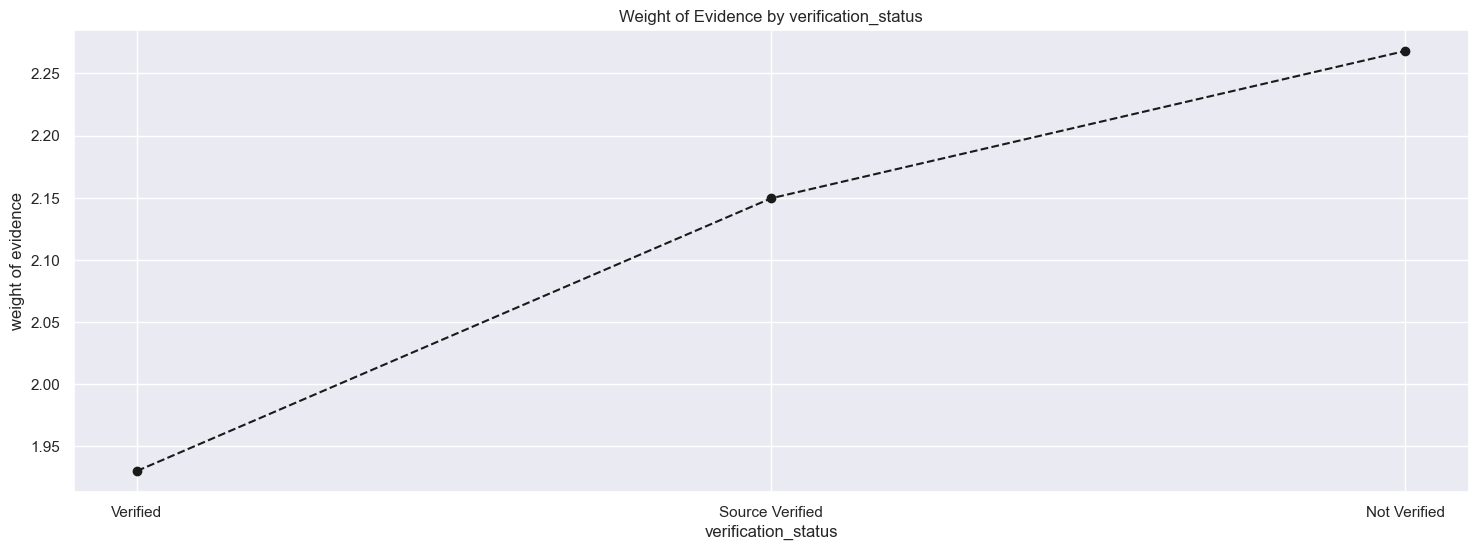

In [84]:
#plot the woe plot
plot_by_woe(df_temp_vs)

from above analysis for Verification status, WoE for 'Not Verified' is high which means that the person whose source is not verified is paying the loan on time.

In [85]:
#check the unique values for 'purpose' column
df_inputs_prepr['purpose'].unique()

array(['credit_card', 'debt_consolidation', 'medical', 'small_business',
       'home_improvement', 'major_purchase', 'other', 'moving', 'car',
       'educational', 'vacation', 'renewable_energy', 'wedding', 'house'],
      dtype=object)

In [88]:
#apply the woe_discrete on 'purpose' column
df_temp_purpose = woe_discrete(X_train, 'purpose', y_train)
df_temp_purpose.head(10)

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,329,0.784195,0.000882,258.0,71.0,0.000776,0.000214,1.290280,NaN,NaN,1.862323
1,small_business,5614,0.785892,0.015050,4412.0,1202.0,0.013276,0.003617,1.300341,0.001698,0.010062,1.862323
2,renewable_energy,276,0.840580,0.000740,232.0,44.0,0.000698,0.000132,1.662548,0.054687,0.362206,1.862323
3,moving,2407,0.850436,0.006453,2047.0,360.0,0.006159,0.001083,1.738027,0.009857,0.075479,1.862323
4,house,1815,0.861157,0.004866,1563.0,252.0,0.004703,0.000758,1.824933,0.010721,0.086907,1.862323
5,other,18968,0.864772,0.050849,16403.0,2565.0,0.049356,0.007718,1.855506,0.003615,0.030573,1.862323
6,medical,3671,0.868428,0.009841,3188.0,483.0,0.009593,0.001453,1.887132,0.003656,0.031627,1.862323
7,vacation,1970,0.882234,0.005281,1738.0,232.0,0.005230,0.000698,2.013753,0.013805,0.126621,1.862323
8,wedding,1887,0.882883,0.005059,1666.0,221.0,0.005013,0.000665,2.020018,0.000649,0.006265,1.862323
9,debt_consolidation,219325,0.886734,0.587959,194483.0,24842.0,0.585196,0.074749,2.057809,0.003851,0.037791,1.862323


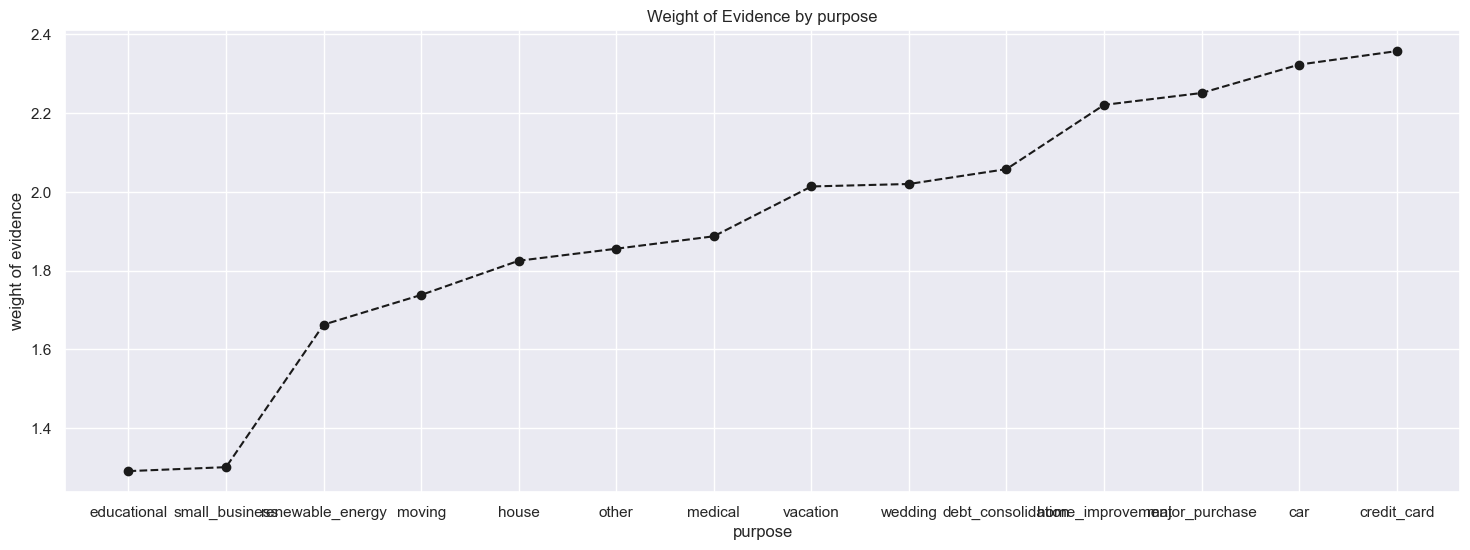

In [89]:
#plot the woe plot
plot_by_woe(df_temp_purpose)

In [90]:
#converting the purpose column into binary encoded, 
#consolidated into 2 columns based on woe values that are close to each other

df_inputs_prepr['purpose:educ_sm_b_ren_en_mov_house_other_med'] = sum(
                                              [df_inputs_prepr['purpose:small_business'],
                                               df_inputs_prepr['purpose:educational'],
                                               df_inputs_prepr['purpose:renewable_energy'],
                                               df_inputs_prepr['purpose:moving'],
          -                                    df_inputs_prepr['purpose:house'],
                                               df_inputs_prepr['purpose:other'],
                                               df_inputs_prepr['purpose:medical']])

df_inputs_prepr['purpose:vac_wedd_debt_home_imp_major_pur_car_cc'] = sum(
                                             [df_inputs_prepr['purpose:wedding'],
                                              df_inputs_prepr['purpose:vacation'],
                                              df_inputs_prepr['purpose:debt_consolidation'],
                                              df_inputs_prepr['purpose:home_improvement'],
                                              df_inputs_prepr['purpose:major_purchase'],
                                              df_inputs_prepr['purpose:car'],
                                              df_inputs_prepr['purpose:credit_card']])

#Check the df_inputs_prepr dataframe
df_inputs_prepr.head(10)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state_NE,addr_state_ME,addr_state_IA,addr_state_NV_HI_FL,addr_state_AL_RI_NM_NC_OK_LA_VA_SD_NY_NJ_MD_CA_MO_TN_ID_AZ_MI_AR_PA_UT_OH,addr_state_MN_IN_KY_DE_MA_GA_WA_WI_OR_TX_IL,addr_state_CT_AK_SC_CO_KS_MT_NH_MS_VT,addr_state_WV_WY,purpose:educ_sm_b_ren_en_mov_house_other_med,purpose:vac_wedd_debt_home_imp_major_pur_car_cc
403678,403678,14560583,16622883,24000,24000,24000.0,60 months,11.99,533.75,B,...,0,0,0,0,1,0,0,0,0,1
241492,241492,34303344,36966688,30000,30000,30000.0,60 months,12.39,673.27,C,...,0,0,0,0,1,0,0,0,0,1
15864,15864,737124,934233,2400,2400,2400.0,36 months,13.49,81.44,C,...,0,0,0,0,1,0,0,0,0,1
320277,320277,25326009,27668971,12000,12000,12000.0,36 months,13.98,410.02,C,...,0,0,0,0,1,0,0,0,0,1
299829,299829,28633305,31166460,5000,5000,5000.0,36 months,11.67,165.29,B,...,0,0,0,0,1,0,0,0,0,1
71921,71921,8365878,10107956,15000,15000,14950.0,36 months,9.99,483.94,B,...,0,0,0,0,0,1,0,0,0,1
375016,375016,18254301,20397010,5000,5000,5000.0,36 months,10.99,163.67,B,...,0,0,0,1,0,0,0,0,0,1
172049,172049,3147852,3860220,11100,11100,11100.0,36 months,13.11,374.60,B,...,0,0,0,0,0,1,0,0,0,1
231971,231971,37600985,40363816,33700,33700,33675.0,60 months,24.99,988.95,F,...,0,0,0,0,1,0,0,0,0,1
335590,335590,22344522,24667077,4375,4375,4375.0,36 months,10.15,141.48,B,...,0,0,0,0,1,0,0,0,0,1


In [91]:
#check the 'initial_list_status' unique values
df_inputs_prepr['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [92]:
#apply the woe_discrete function on 'initial_list_status'
df_temp_ins = woe_discrete(X_train, 'initial_list_status', y_train)
df_temp_ins.head(10)

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,242528,0.880018,0.65016,213429.0,29099.0,0.642205,0.087558,1.99260,NaN,NaN,1.856984
1,w,130500,0.911180,0.34984,118909.0,11591.0,0.357795,0.034877,2.32813,0.031162,0.335529,1.856984


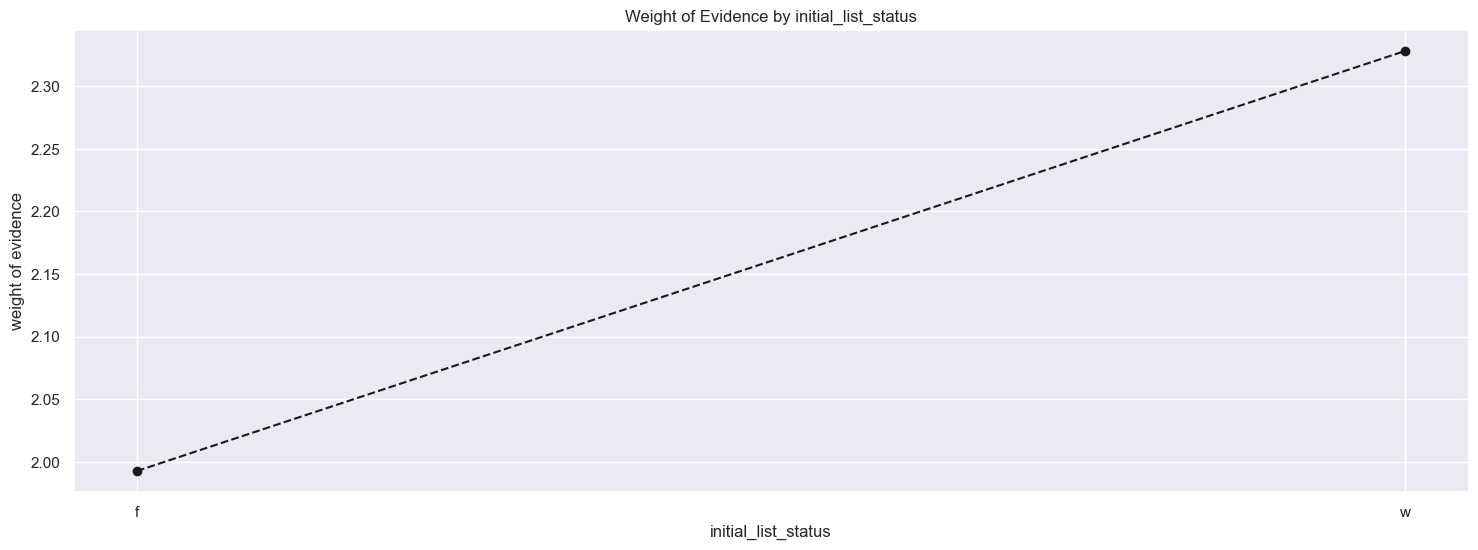

In [93]:
#plot the woe plot
plot_by_woe(df_temp_ins)

PREPROCESSING CONTINUOUS VARIABLES:AUTOMATING CALCULATIONS AND VISUALIZING RESULTS

In [ ]:
#Earlier we defined a function for categorical values

#Now, this is the function for preprocessing of continuous variables

def woe_continuous(df,continuous_variable_name,good_bad_variable_df):
    df = pd.concat([df[continuous_variable_name],good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1)
    df= df.iloc[:,[0,1,3]]
    df.columns=[continuous_variable_name,'n_obs','prop_good']
    df['prop_n_obs']=df['n_obs']/df['n_obs'].sum()
    df['n_good']=df['prop_good']*df['n_obs']
    df['n_bad']=(1-df['prop_good'])*df['n_obs']
    df['prop_n_good']=df['n_good']/df['n_good'].sum()
    df['prop_n_bad']=df['n_bad']/df['n_good'].sum()
    #df['WoE']=np.log(df['prop_n_good']/df['prop_n_bad'])
    df['WoE'] = np.where(df['prop_n_bad'] != 0,np.log(df['prop_n_good']/df['prop_n_bad']),0)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE']=df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])*df['WoE']
    df['IV']=df['IV'].sum()
    return df

PREPROCESSING CONTNUOUS VARIABLES:CREATING DUMMY VARIABLES

In [98]:
#check the 'term_int' unique values
df_inputs_prepr['term_int'].unique()

array([60, 36])

In [103]:
#apply the woe_continuous function on 'term_init' column
df_temp_term_init = woe_continuous(X_train, 'term_int', y_train)
df_temp_term_init.head(10)

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,270441,0.903214,0.724988,244266.0,26175.0,0.734993,0.078760,2.233453,NaN,NaN,1.86472
1,60,102587,0.858510,0.275012,88072.0,14515.0,0.265007,0.043675,1.802972,0.044703,0.430481,1.86472


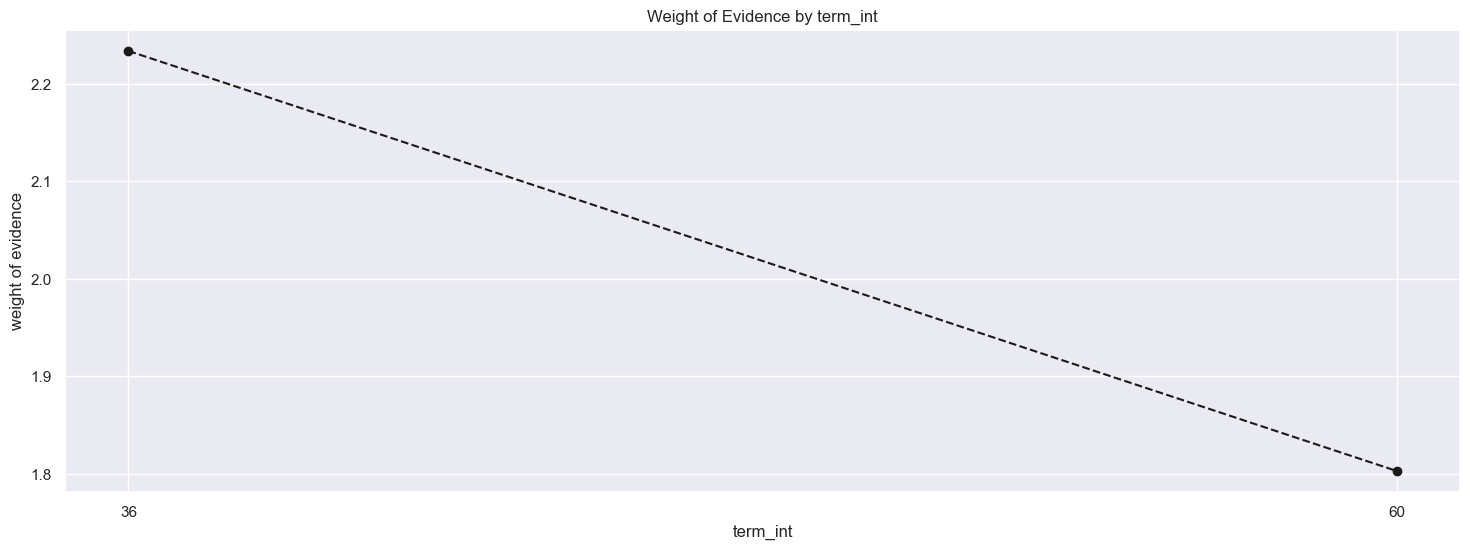

In [104]:
#plot the woe plot
plot_by_woe(df_temp_term_init)

In [106]:
#Convert it into binary encoded format by putting 1 and 0 inplace

df_inputs_prepr['term:36']=np.where((df_inputs_prepr['term_int'] ==36),1,0)
df_inputs_prepr['term:60']=np.where((df_inputs_prepr['term_int']==60),1,0)

In [110]:
#check the unique values of 'emp_length_int' column
df_inputs_prepr['emp_length_int'].unique()

array([2.0, 3.0, 6.0, 10.0, 7.0, '0', 8.0, 1.0, 5.0, 9.0, 4.0],
      dtype=object)

In [108]:
#apply the woe_continuous function on emp_length_int
df_temp_emp_len = woe_continuous(X_train, 'emp_length_int', y_train)
df_temp_emp_len.head(10)

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1.0,52769,0.883625,0.141461,46628.0,6141.0,0.140303,0.018478,2.027214,NaN,NaN,1.846616
1,2.0,33032,0.889925,0.088551,29396.0,3636.0,0.088452,0.010941,2.089974,0.006300,0.062761,1.846616
2,3.0,29152,0.891500,0.078150,25989.0,3163.0,0.078201,0.009517,2.106152,0.001575,0.016178,1.846616
3,4.0,22466,0.889923,0.060226,19993.0,2473.0,0.060159,0.007441,2.089950,0.001577,0.016202,1.846616
4,5.0,24710,0.884662,0.066242,21860.0,2850.0,0.065776,0.008576,2.037339,0.005260,0.052611,1.846616
5,6.0,21000,0.882762,0.056296,18538.0,2462.0,0.055781,0.007408,2.018849,0.001900,0.018491,1.846616
6,7.0,21028,0.889956,0.056371,18714.0,2314.0,0.056310,0.006963,2.090294,0.007194,0.071446,1.846616
7,8.0,17985,0.890353,0.048214,16013.0,1972.0,0.048183,0.005934,2.094353,0.000397,0.004058,1.846616
8,9.0,14224,0.889975,0.038131,12659.0,1565.0,0.038091,0.004709,2.090483,0.000378,0.003870,1.846616
9,10.0,119840,0.900359,0.321263,107899.0,11941.0,0.324666,0.035930,2.201218,0.010384,0.110735,1.846616


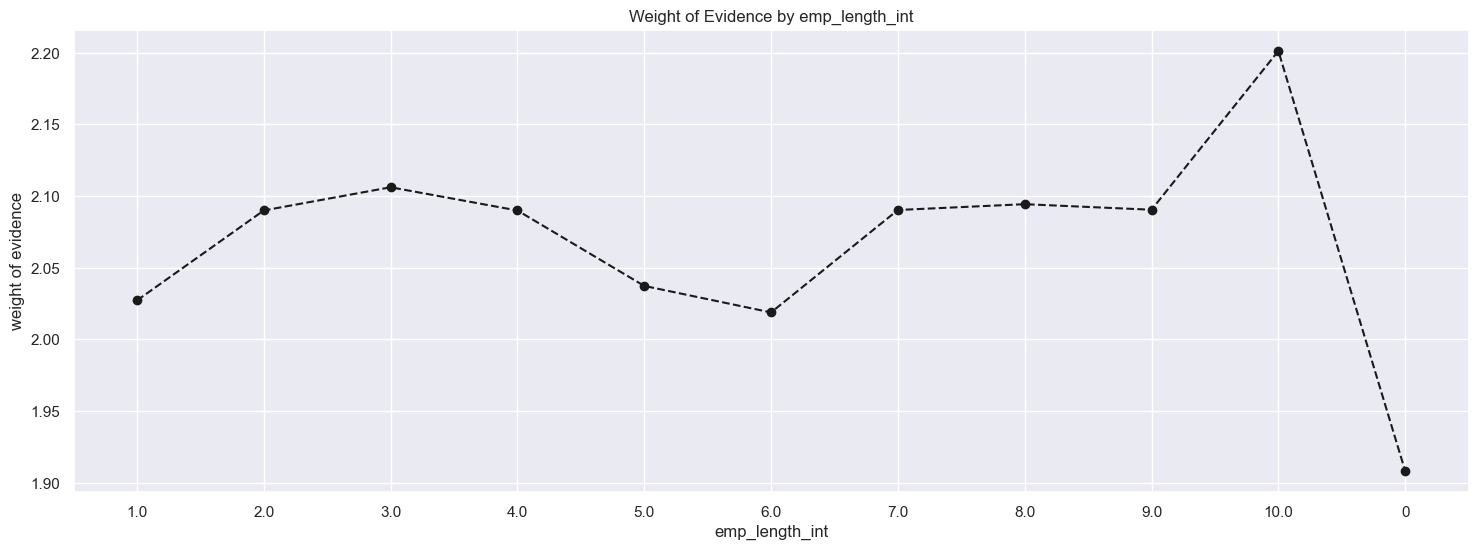

In [109]:
#plot the woe plot for emp_length_int
plot_by_woe(df_temp_emp_len)

In [111]:
##Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are 
#close to each other

df_inputs_prepr['emp_length:0']=np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1']=np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2-4']=np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)),1,0)
df_inputs_prepr['emp_length:5-6']=np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)),1,0)
df_inputs_prepr['emp_length:7-9']=np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)),1,0)
df_inputs_prepr['emp_length:10']=np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [151]:
#code to find column name based on string values
#[col for col in df_inputs_prepr.columns if 'since_issued_date' in col]
#df_inputs_prepr.filter(regex='(int_rate)') 

In [118]:
#check the unique values in 'mths_since_issued_date' column
df_inputs_prepr['months_since_issue_date'].unique()

array([113., 105., 148., 109., 107., 118., 111., 128., 110., 114., 106.,
       137., 159., 130., 112., 173., 108., 126., 136., 122., 119., 120.,
       134., 167., 129., 117., 116., 146., 131., 135., 121., 187., 150.,
       152., 132., 145., 141., 138., 147., 123., 151., 140., 153., 133.,
       165., 124., 169., 176., 125., 149., 160., 185., 139., 157., 163.,
       155., 170., 144., 161., 143., 142., 162., 183., 156., 158., 168.,
       189., 190., 154., 174., 164., 186., 171., 172., 182., 184., 188.,
       166., 180., 178., 181., 191., 179., 177., 193., 195., 192., 194.])

In [132]:
#get a range divided values for continous variable using the cut function defined in pandas
df_inputs_prepr['mths_since_issued_date_factor']=pd.cut(df_inputs_prepr['months_since_issue_date'],8)

In [145]:
#check how the buckets are divided
(df_inputs_prepr['mths_since_issued_date_factor'].sort_values().unique()).tolist()


[Interval(104.91, 116.25, closed='right'),
 Interval(116.25, 127.5, closed='right'),
 Interval(127.5, 138.75, closed='right'),
 Interval(138.75, 150.0, closed='right'),
 Interval(150.0, 161.25, closed='right'),
 Interval(161.25, 172.5, closed='right'),
 Interval(172.5, 183.75, closed='right'),
 Interval(183.75, 195.0, closed='right')]

In [134]:
#apply the woe_continuous function
df_temp_msid = woe_continuous(df_inputs_prepr,'mths_since_issued_date_factor',df_targets_prepr)
df_temp_msid

,mths_since_issued_date_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(104.91, 116.25]",188543,0.917775,0.505439,173040.0,15503.0,0.520675,0.046648,2.412489,NaN,NaN,1.893042
1,"(116.25, 127.5]",102257,0.876224,0.274127,89600.0,12657.0,0.269605,0.038085,1.957145,0.041551,0.455344,1.893042
2,"(127.5, 138.75]",44013,0.846591,0.117988,37261.0,6752.0,0.112118,0.020317,1.708108,0.029633,0.249036,1.893042
3,"(138.75, 150.0]",19406,0.846645,0.052023,16430.0,2976.0,0.049438,0.008955,1.708529,0.000055,0.000420,1.893042
4,"(150.0, 161.25]",10451,0.858674,0.028017,8974.0,1477.0,0.027003,0.004444,1.804319,0.012028,0.095790,1.893042
5,"(161.25, 172.5]",5009,0.867239,0.013428,4344.0,665.0,0.013071,0.002001,1.876764,0.008565,0.072445,1.893042
6,"(172.5, 183.75]",1775,0.840000,0.004758,1491.0,284.0,0.004486,0.000855,1.658228,0.027239,0.218536,1.893042
7,"(183.75, 195.0]",1574,0.761118,0.004220,1198.0,376.0,0.003605,0.001131,1.158820,0.078882,0.499408,1.893042


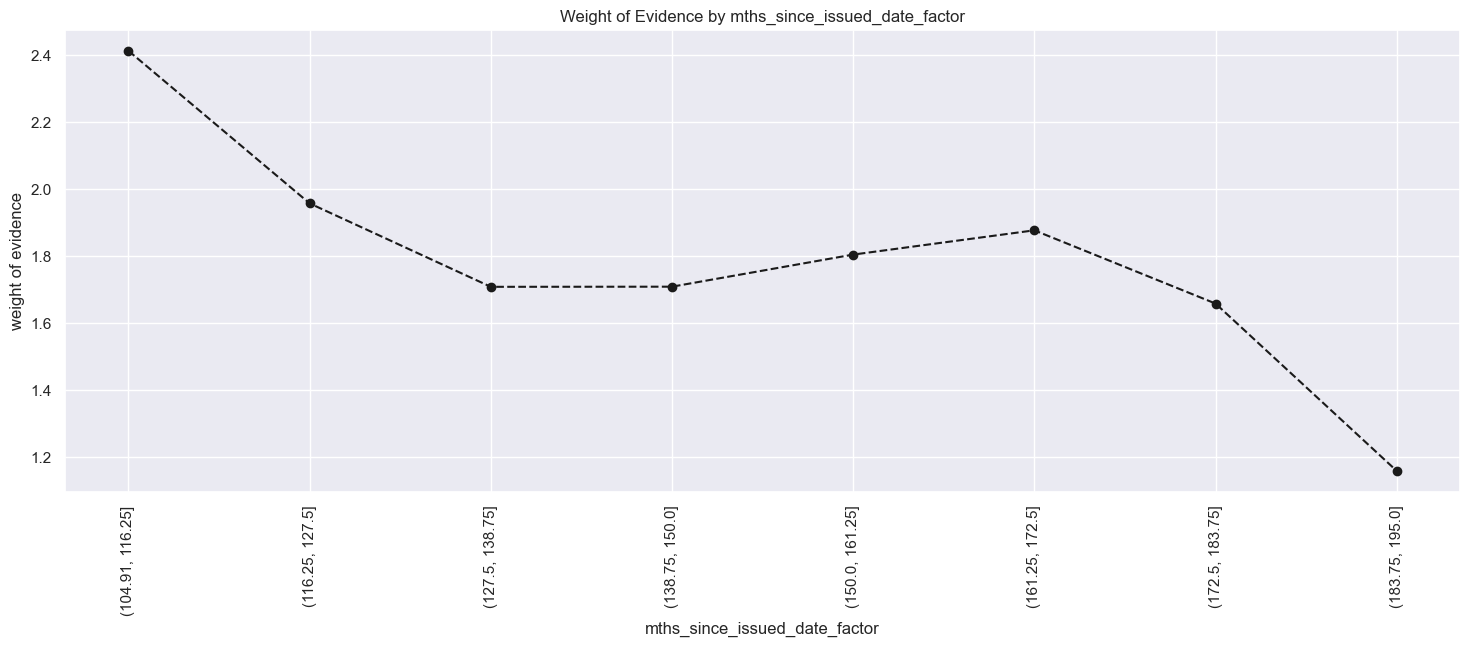

In [135]:
#plot the woe plot
plot_by_woe(df_temp_msid,90)

Initially we created 50 buckets and analyzed the data where for less no. of months(say 104 to 112) we have high WoE values but then WoE(though fluctuating) is not varying so much in values so we divided our data into 8 buckets instead based on 88 unique values for 'months_since_issue_date' column.

In [146]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_issued_date:<116']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(116)),1,0)
df_inputs_prepr['mths_since_issued_date:116-127']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(116,127)),1,0)
df_inputs_prepr['mths_since_issued_date:127-138']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(127,138)),1,0)
df_inputs_prepr['mths_since_issued_date:138-150']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(138,150)),1,0)
df_inputs_prepr['mths_since_issued_date:150-161']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(150,161)),1,0)
df_inputs_prepr['mths_since_issued_date:161-172']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(161,172)),1,0)
df_inputs_prepr['mths_since_issued_date:172-183']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(172,183)),1,0)
df_inputs_prepr['mths_since_issued_date:>183']=np.where(df_inputs_prepr['months_since_issue_date'].isin(range(183,int(df_inputs_prepr['months_since_issue_date'].max()))),1,0)

In [160]:
#check the values for 'int_rate'
df_inputs_prepr['int_rate'].nunique()


504

In [161]:
#apply the cut function on 'int_rate_factor'
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'],50)

In [165]:
#apply the woe_continuos function
df_temp_int_rt = woe_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp_int_rt.head(10)

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",795,0.961006,0.002131,764.0,31.0,0.002299,0.000093,3.204581,NaN,NaN,2.047293
1,"(5.833, 6.246]",8518,0.980629,0.022835,8353.0,165.0,0.025134,0.000496,3.924431,0.019623,0.719850,2.047293
2,"(6.246, 6.658]",7876,0.971178,0.021114,7649.0,227.0,0.023016,0.000683,3.517380,0.009451,0.407050,2.047293
3,"(6.658, 7.071]",1841,0.966323,0.004935,1779.0,62.0,0.005353,0.000187,3.356672,0.004856,0.160708,2.047293
4,"(7.071, 7.484]",3161,0.977222,0.008474,3089.0,72.0,0.009295,0.000217,3.758937,0.010900,0.402264,2.047293
5,"(7.484, 7.897]",12640,0.963212,0.033885,12175.0,465.0,0.036634,0.001399,3.265103,0.014010,0.493834,2.047293
6,"(7.897, 8.31]",9640,0.951971,0.025843,9177.0,463.0,0.027613,0.001393,2.986729,0.011241,0.278374,2.047293
7,"(8.31, 8.722]",6641,0.965216,0.017803,6410.0,231.0,0.019288,0.000695,3.323197,0.013245,0.336468,2.047293
8,"(8.722, 9.135]",9531,0.938726,0.025550,8947.0,584.0,0.026921,0.001757,2.729173,0.026490,0.594024,2.047293
9,"(9.135, 9.548]",6545,0.966081,0.017546,6323.0,222.0,0.019026,0.000668,3.349272,0.027355,0.620099,2.047293


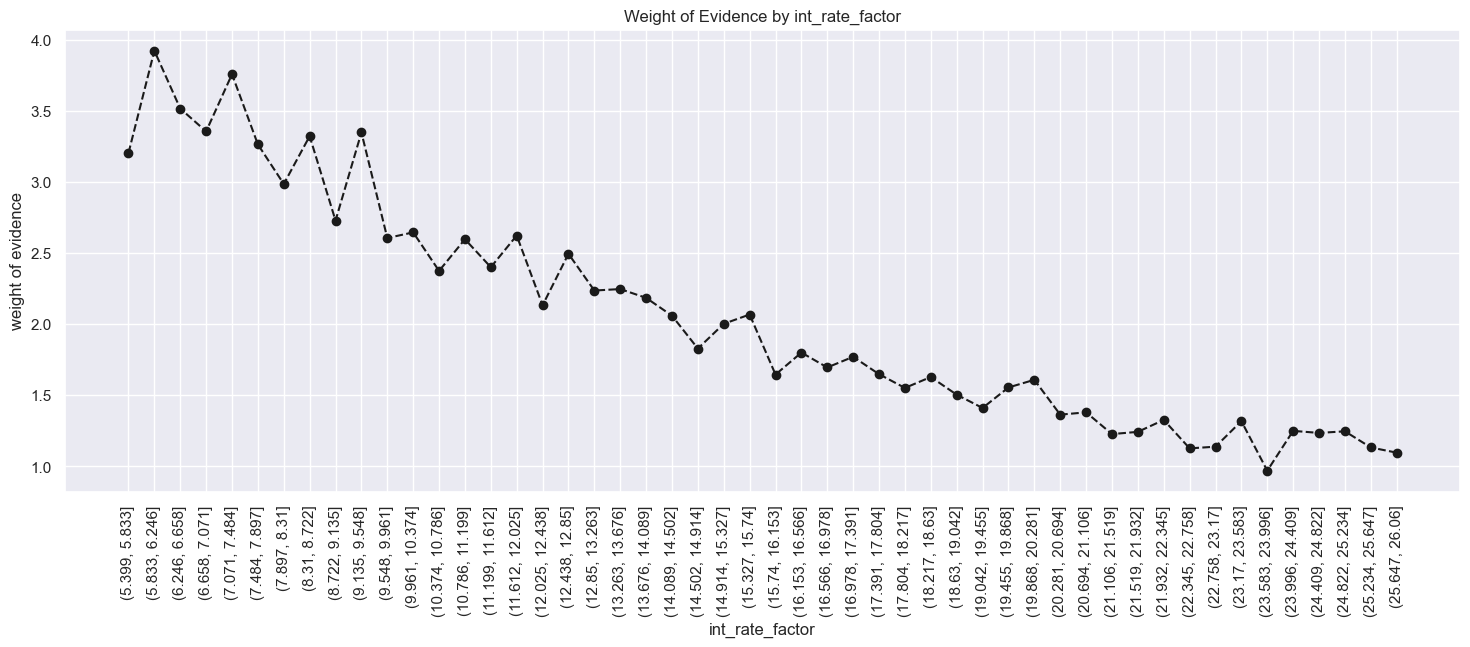

In [163]:
#plot the woe plot
plot_by_woe(df_temp_int_rt,90)

As we can observe that WoE values drop rate increases as interest rate crosses 9.548. Let's bucket create a binary column for consolidated int_rate with WoE values close to each other

In [164]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['int_rate:<9.548']=np.where((df_inputs_prepr['int_rate']<= 0.548),1,0)
df_inputs_prepr['int_rate:9.548-12.85']=np.where((df_inputs_prepr['int_rate']>9.548)&(df_inputs_prepr['int_rate']<=12.025),1,0)
df_inputs_prepr['int_rate:12.85-15.74']=np.where((df_inputs_prepr['int_rate']>12.025)&(df_inputs_prepr['int_rate']<=15.74),1,0)
df_inputs_prepr['int_rate:15.74-20.281']=np.where((df_inputs_prepr['int_rate']>15.74)&(df_inputs_prepr['int_rate']<=20.281),1,0)
df_inputs_prepr['int_rate:20.281']=np.where((df_inputs_prepr['int_rate']>20.281),1,0)



In [166]:
#prepossing of 'funded_amt_factor'
df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)
df_temp_int_faf = woe_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)
df_temp_int_faf.head(10)

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1206,0.900498,0.003233,1086.0,120.0,0.003268,0.000361,2.202765,NaN,NaN,1.851361
1,"(1190.0, 1880.0]",3048,0.904856,0.008171,2758.0,290.0,0.008299,0.000873,2.252380,0.004358,0.049615,1.851361
2,"(1880.0, 2570.0]",6010,0.894343,0.016111,5375.0,635.0,0.016173,0.001911,2.135889,0.010513,0.116491,1.851361
3,"(2570.0, 3260.0]",7183,0.888765,0.019256,6384.0,799.0,0.019209,0.002404,2.078189,0.005578,0.057700,1.851361
4,"(3260.0, 3950.0]",4724,0.893522,0.012664,4221.0,503.0,0.012701,0.001514,2.127237,0.004757,0.049048,1.851361
5,"(3950.0, 4640.0]",9073,0.891326,0.024323,8087.0,986.0,0.024334,0.002967,2.104357,0.002197,0.022880,1.851361
6,"(4640.0, 5330.0]",15886,0.894687,0.042587,14213.0,1673.0,0.042767,0.005034,2.139539,0.003361,0.035182,1.851361
7,"(5330.0, 6020.0]",17171,0.907169,0.046031,15577.0,1594.0,0.046871,0.004796,2.279549,0.012482,0.140010,1.851361
8,"(6020.0, 6710.0]",6886,0.885710,0.018460,6099.0,787.0,0.018352,0.002368,2.047652,0.021459,0.231897,1.851361
9,"(6710.0, 7400.0]",11717,0.897414,0.031411,10515.0,1202.0,0.031639,0.003617,2.168816,0.011704,0.121164,1.851361


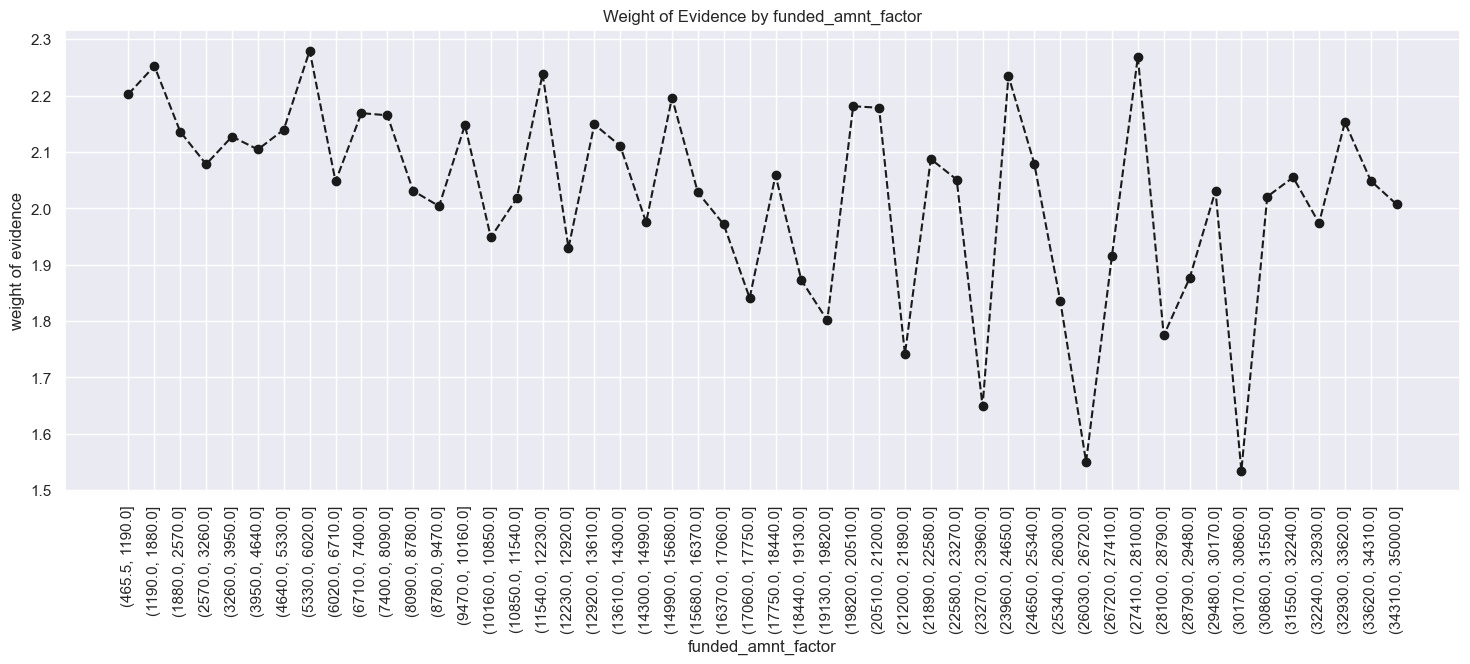

In [168]:
#plot the woe_plot
plot_by_woe(df_temp_int_faf,90)

In [178]:
#check the no. of unique values for 'mths_since_earliest_cr_line'
df_inputs_prepr['mths_since_earliest_cr_line'].nunique()

508

In [183]:
#apply the cut function on 'mths_since_earliest_cr_line'
df_inputs_prepr['mths_since_earliest_cr_line'] = df_inputs_prepr['mths_since_earliest_cr_line'].astype(float)
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'],50)


In [186]:
#check the 'mths_since_earliest_cr_line_factor'
df_inputs_prepr['mths_since_earliest_cr_line_factor'].sort_values().unique()

[(-0.656, 13.12], (131.2, 144.32], (144.32, 157.44], (157.44, 170.56], (170.56, 183.68], ..., (590.4, 603.52], (603.52, 616.64], (616.64, 629.76], (629.76, 642.88], (642.88, 656.0]]
Length: 41
Categories (50, interval[float64, right]): [(-0.656, 13.12] < (13.12, 26.24] < (26.24, 39.36] < (39.36, 52.48] ... (603.52, 616.64] < (616.64, 629.76] < (629.76, 642.88] < (642.88, 656.0]]

In [187]:
#apply the woe_continuos function
df_temp_int_mse_cr_line = woe_continuous(df_inputs_prepr,'mths_since_earliest_cr_line_factor',df_targets_prepr)
df_temp_int_mse_cr_line.head(10)

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.656, 13.12]",25,0.88,0.000067,22.0,3.0,0.000066,0.000009,1.99243,NaN,NaN,1.852287
1,"(13.12, 26.24]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
2,"(26.24, 39.36]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
3,"(39.36, 52.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
4,"(52.48, 65.6]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
5,"(65.6, 78.72]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
6,"(78.72, 91.84]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
7,"(91.84, 104.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
8,"(104.96, 118.08]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287
9,"(118.08, 131.2]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.852287


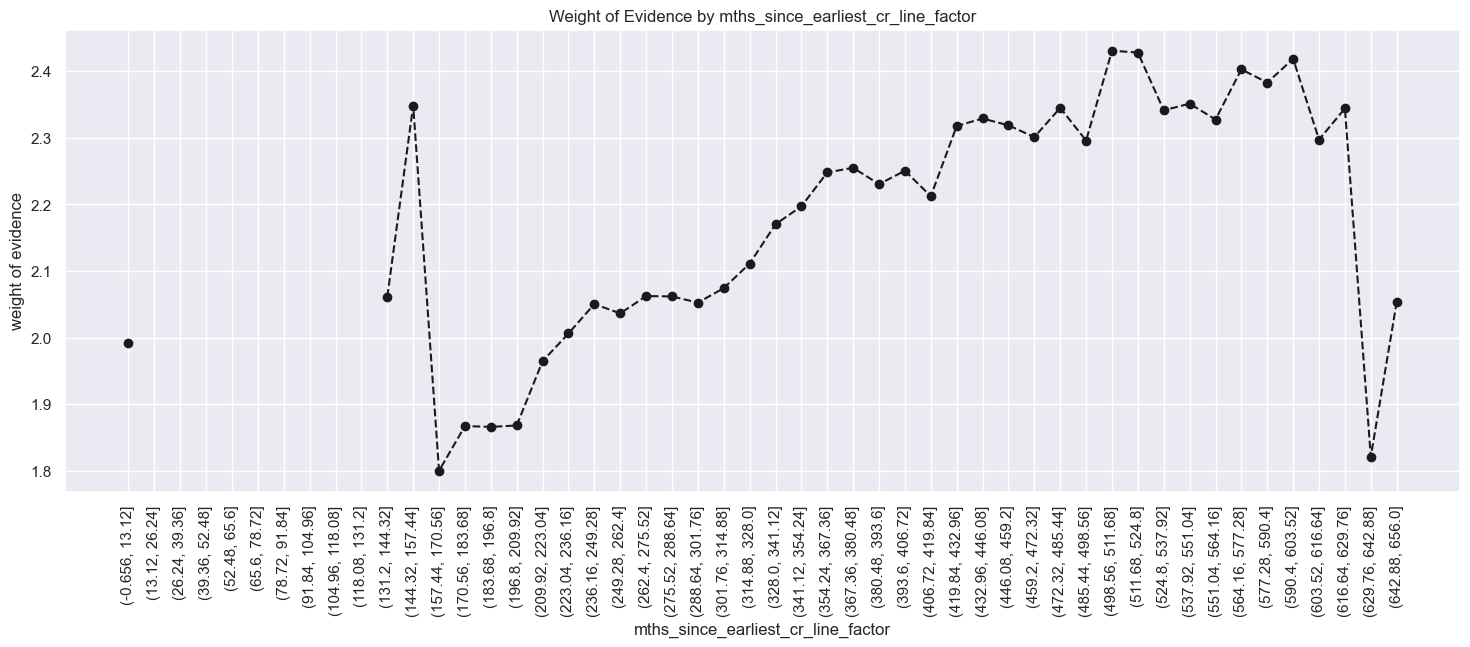

In [188]:
#plot the woe_plot
plot_by_woe(df_temp_int_mse_cr_line,90)

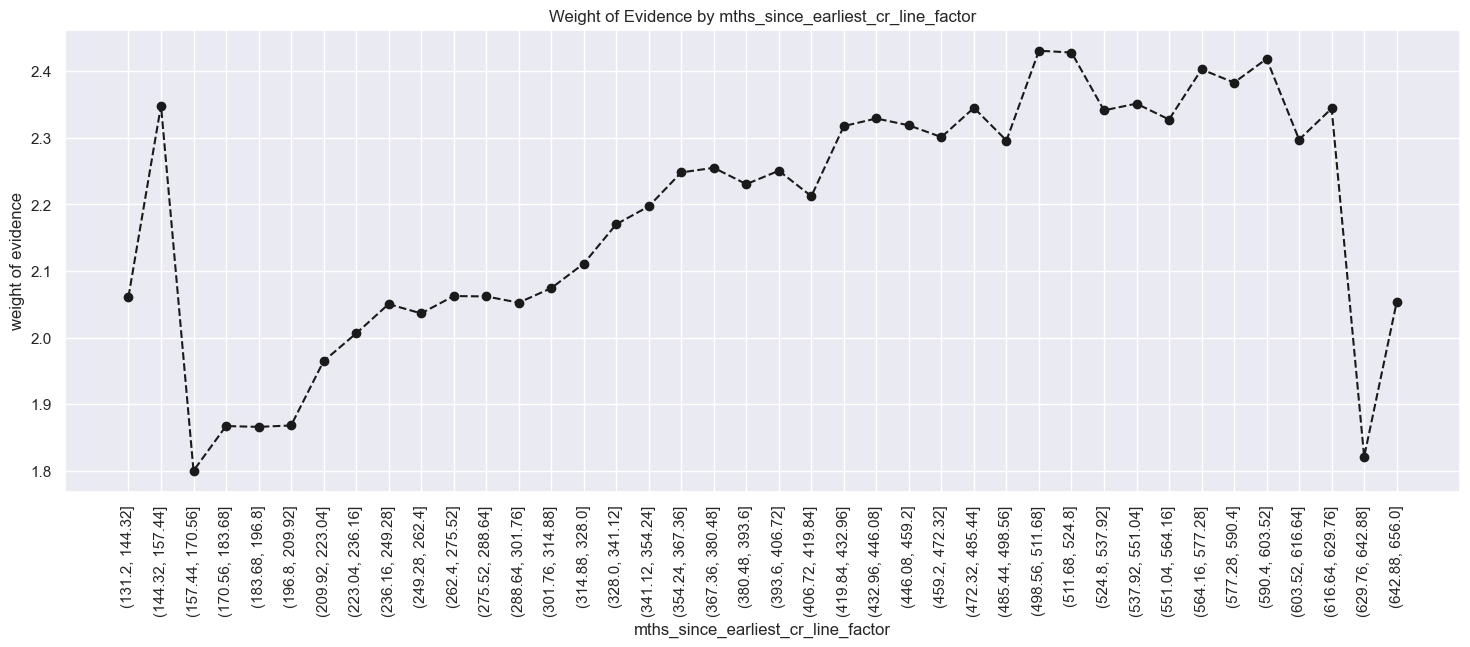

In [190]:
#plot for df_temp.iloc[10:,:],90
plot_by_woe(df_temp_int_mse_cr_line.iloc[10:,:],90)

In [192]:
#Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_earliest_cr_line:<140']   = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:140-239']= np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140,239)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:240-339']= np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(240,339)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:340-439']= np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(340,439)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:440-539']= np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(440,539)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:540-600']= np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(540,639)),1,0)
df_inputs_prepr['mths_since_earliest_cr_line:>600']   = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(640,int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))),1,0)
                                                                 
#df_inputs_prepr.head(5)                                                                

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,int_rate:20.281,funded_amnt_factor,mths_since_earliest_cr_line_factor,mths_since_earliest_cr_line:<140,mths_since_earliest_cr_line:140-239,mths_since_earliest_cr_line:240-339,mths_since_earliest_cr_line:340-439,mths_since_earliest_cr_line:440-539,mths_since_earliest_cr_line:540-600,mths_since_earliest_cr_line:>600
403678,403678,14560583,16622883,24000,24000,24000.0,60 months,11.99,533.75,B,...,0,"(23960.0, 24650.0]","(275.52, 288.64]",0,0,1,0,0,0,0
241492,241492,34303344,36966688,30000,30000,30000.0,60 months,12.39,673.27,C,...,0,"(29480.0, 30170.0]","(642.88, 656.0]",0,0,0,0,0,0,1
15864,15864,737124,934233,2400,2400,2400.0,36 months,13.49,81.44,C,...,0,"(1880.0, 2570.0]","(236.16, 249.28]",0,0,1,0,0,0,0
320277,320277,25326009,27668971,12000,12000,12000.0,36 months,13.98,410.02,C,...,0,"(11540.0, 12230.0]","(196.8, 209.92]",0,1,0,0,0,0,0
299829,299829,28633305,31166460,5000,5000,5000.0,36 months,11.67,165.29,B,...,0,"(4640.0, 5330.0]","(288.64, 301.76]",0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73349,73349,8314689,10056831,10000,10000,10000.0,60 months,26.06,299.77,G,...,1,"(9470.0, 10160.0]","(196.8, 209.92]",0,1,0,0,0,0,0
371403,371403,18495964,20658563,22650,22650,22650.0,36 months,18.99,830.15,E,...,0,"(22580.0, 23270.0]","(249.28, 262.4]",0,0,1,0,0,0,0
312201,312201,26289016,28761893,11400,11400,11400.0,36 months,6.03,346.97,A,...,0,"(10850.0, 11540.0]","(446.08, 459.2]",0,0,0,0,1,0,0
267336,267336,32769639,35412809,8000,8000,8000.0,36 months,13.35,270.91,C,...,0,"(7400.0, 8090.0]","(301.76, 314.88]",0,0,1,0,0,0,0


In [195]:
#check the 'installment' unique values
df_inputs_prepr['installment'].unique()

array([533.75, 673.27,  81.44, ..., 415.  , 124.32, 830.15])

In [197]:
#apply the cut function and woe_continuos function on 'installment'
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'],50)
df_temp_if = woe_continuous(df_inputs_prepr,'installment',df_targets_prepr)
df_temp_if.head(10)

,installment,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,15.67,1,1.0,0.000003,1.0,0.0,0.000003,0.000000,0.0,NaN,NaN,inf
1,15.69,1,1.0,0.000003,1.0,0.0,0.000003,0.000000,0.0,0.0,0.0,inf
2,15.75,1,1.0,0.000003,1.0,0.0,0.000003,0.000000,0.0,0.0,0.0,inf
3,15.76,1,1.0,0.000003,1.0,0.0,0.000003,0.000000,0.0,0.0,0.0,inf
4,15.91,1,0.0,0.000003,0.0,1.0,0.000000,0.000003,-inf,1.0,inf,inf
5,16.08,1,1.0,0.000003,1.0,0.0,0.000003,0.000000,0.0,1.0,inf,inf
6,16.25,1,1.0,0.000003,1.0,0.0,0.000003,0.000000,0.0,0.0,0.0,inf
7,16.31,1,1.0,0.000003,1.0,0.0,0.000003,0.000000,0.0,0.0,0.0,inf
8,16.47,1,1.0,0.000003,1.0,0.0,0.000003,0.000000,0.0,0.0,0.0,inf
9,16.73,1,1.0,0.000003,1.0,0.0,0.000003,0.000000,0.0,0.0,0.0,inf


In [ ]:
#plot the woe_plot
plot_by_woe(df_temp_if,90)

Error in callback <function _draw_all_if_interactive at 0x7ff02d796050> (for post_execute):


In [ ]:
#check the 'deling_2yrs' column
df_inputs_prepr['delinq_2yrs']=

In [ ]:
#apply the cut function
df_inputs_prepr['delinq_2yrs_factors']=

In [ ]:
#apply the woe_continuos function


In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['delinq_2yrs:0']=
df_inputs_prepr['delinq_2yrs:0-3']=
df_inputs_prepr['delinq_2yrs:3-7']=
df_inputs_prepr['delinq_2yrs:7-9']=
df_inputs_prepr['delinq_2yrs:9-11']=
df_inputs_prepr['delinq_2yrs:11-12']=
df_inputs_prepr['delinq_2yrs:12-18']=
df_inputs_prepr['delinq_2yrs:>18']=

In [ ]:
#check the 'inq_last_6mths' column
df_inputs_prepr['inq_last_6mths']=

In [ ]:
#apply the woe_continuos function


In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['inq_last_6mths:0']=
df_inputs_prepr['inq_last_6mths:0-3']=
df_inputs_prepr['inq_last_6mths:3-7']=
df_inputs_prepr['inq_last_6mths:7-9']=
df_inputs_prepr['inq_last_6mths:9-11']=
df_inputs_prepr['inq_last_6mths:11-12']=
df_inputs_prepr['inq_last_6mths:12-18']=
df_inputs_prepr['inq_last_6mths:18']=

In [ ]:
#convert the 'open_acc' into float and then apply the woe_continuos function

df_inputs_prepr['open_acc']=
df_temp=woe_continuous(df_inputs_prepr,'open_acc',df_targets_prepr)


In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other
df_inputs_prepr['open_acc:=0']=
df_inputs_prepr['open_acc:0-1']=
df_inputs_prepr['open_acc:1-4']=
df_inputs_prepr['open_acc:4-28']=
df_inputs_prepr['open_acc:28-35']=
df_inputs_prepr['open_acc:35-45']=
df_inputs_prepr['open_acc:>45']=

In [ ]:
#convert the 'pub_rec' into float
df_inputs_prepr['pub_rec']=

In [ ]:
#apply the woe_continuos function


In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other
df_inputs_prepr['pub_rec:0-3']=
df_inputs_prepr['pub_rec:3-6']=
df_inputs_prepr['pub_rec:6-8']=
df_inputs_prepr['pub_rec:8']=

In [ ]:
#convert the 'total_acc' into float
df_inputs_prepr['total_acc']=

In [ ]:
#apply the cut function to create buckets of continuos variables
df_inputs_prepr['total_acc_fac']=pd.cut(df_inputs_prepr['total_acc'],50)

In [ ]:
#apply the woe_continuos function


In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['total_acc:<0']=
df_inputs_prepr['total_acc:0-4']=
df_inputs_prepr['total_acc:4-62']=
df_inputs_prepr['total_acc:62-72']=
df_inputs_prepr['total_acc:72-85']=
df_inputs_prepr['total_acc:>85']=

In [ ]:
#convert the 'acc_now_delinq' into float type
df_inputs_prepr['acc_now_delinq']=

In [ ]:
#apply the woe_continuos function


In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['acc_now_delinq:<0']=
df_inputs_prepr['acc_now_delinq:0-1']=
df_inputs_prepr['acc_now_delinq:1-2']=
df_inputs_prepr['acc_now_delinq:2-3']=
df_inputs_prepr['acc_now_delinq:3-5']=
df_inputs_prepr['acc_now_delinq:>5']=

In [ ]:
#For 'total_rev_hi_lim' column take only those values which are less than 80000

df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['total_rev_hi_lim']<= 80000,:]

In [ ]:
#apply the cut and woe_continuos function
df_inputs_prepr['total_rev_hi_lim_factor']=pd.cut(df_inputs_prepr_temp['total_rev_hi_lim'],50)
df_temp=woe_continuous(df_inputs_prepr,'total_rev_hi_lim_factor',df_targets_prepr)
df_temp

In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['total_rev_hi_lim:<=5k']=
df_inputs_prepr['total_rev_hi_lim:5k_10k']=
df_inputs_prepr['total_rev_hi_lim:10k_20k']=
df_inputs_prepr['total_rev_hi_lim:20k_30k']=
df_inputs_prepr['total_rev_hi_lim:30k_40k']=
df_inputs_prepr['total_rev_hi_lim:40k_50k']=
df_inputs_prepr['total_rev_hi_lim:50k_65k']=
df_inputs_prepr['total_rev_hi_lim:65k_80k']=
df_inputs_prepr['total_rev_hi_lim:>80k']=


In [ ]:
#apply the cut and woe_contionus function on 'annual_inc'

df_inputs_prepr['annual_inc_factor']=pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp=woe_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

As we can see higher values in annual_inc has very less observation so we will take only those annual income which are less than 140000

In [ ]:
#take only those observations which are less than 140000
df_inputs_prepr_temp=df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<= 140000,:]

In [ ]:
#apply the cut and woe_contionus function on 'annual_inc'


In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['annual_inc:<20k']=
df_inputs_prepr['annual_inc:20k-30k']=
df_inputs_prepr['annual_inc:30k-40k']=
df_inputs_prepr['annual_inc:40k-50k']=
df_inputs_prepr['annual_inc:50k-60k']=
df_inputs_prepr['annual_inc:60k-70k']=
df_inputs_prepr['annual_inc:70k-80k']=
df_inputs_prepr['annual_inc:80k-90k']=
df_inputs_prepr['annual_inc:90k-100k']=
df_inputs_prepr['annual_inc:100k-120k']=
df_inputs_prepr['annual_inc:120k-140k']=
df_inputs_prepr['annual_inc:>140k']=

In [ ]:
#'mths_since_last_delinq' has null values so take only the notnull values
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]

#apply the cut and woe_continuos function on 'mths_since_last_delinq'


In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_last_delinq:Missing']=
df_inputs_prepr['mths_since_last_delinq:0-3']=
df_inputs_prepr['mths_since_last_delinq:4-30']=
df_inputs_prepr['mths_since_last_delinq:31-56']=
df_inputs_prepr['mths_since_last_delinq:>=57']=

In [ ]:
#apply the cut function on 'dti_factor'
df_inputs_prepr['dti_factor']=pd.cut(df_inputs_prepr['dti'],50)

In [ ]:
#apply the woe_continuos function


In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['dti:<5']=
df_inputs_prepr['dti:5-10']=
df_inputs_prepr['dti:10-15']=
df_inputs_prepr['dti:15-20']=
df_inputs_prepr['dti:20-25']=
df_inputs_prepr['dti:25-30']=
df_inputs_prepr['dti:30-35']=
df_inputs_prepr['dti:35-40']=
df_inputs_prepr['dti:>40']=

In [ ]:
#'mths_since_last_record' has null values so take only the notnull values
df_inputs_prepr_temp=df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]

#apply the cut function
df_inputs_prepr_temp['mths_since_last_record']=pd.cut(df_inputs_prepr_temp['mths_since_last_record'],50)


In [ ]:
#apply the woe_continuos function



In [ ]:
#plot the woe_plot


In [ ]:
###Convert it into binary encoded format by putting 1 and 0 inplace for WoE values that are close to each other

df_inputs_prepr['mths_since_last_record:Missing']=
df_inputs_prepr['mths_since_last_record:0-90']=
df_inputs_prepr['mths_since_last_record:90-120']=
df_inputs_prepr['mths_since_last_record:120-127']=
df_inputs_prepr['mths_since_last_record:>=127']=

In [ ]:
#assigning the dataframe into a new variable
loan_data_inputs_train= df_inputs_prepr

In [ ]:
loan_data_inputs_train.shape

In [ ]:
load_ds_targets_train.shape

In [ ]:
loan_data_inputs_test= df_inputs_prepr

In [ ]:
loan_data_inputs_test.shape

In [ ]:
load_ds_targets_test.shape

In [ ]:
#import the preprosess dataframe into a new csv file

loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
load_ds_targets_train.to_csv('loan_data_targets_train.csv')

loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
load_ds_targets_test.to_csv('loan_data_targets_test.csv')

In [170]:
#code to find column name based on string values
#[col for col in df_inputs_prepr.columns if 'since_issued_date' in col]
df_inputs_prepr.filter(regex='(earliest_cr_line)') 

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
403678,Jun-00,2000-06-01,279.0
241492,Feb-70,1970-02-01,643.0
15864,Sep-03,2003-09-01,240.0
320277,Aug-06,2006-08-01,205.0
299829,Dec-98,1998-12-01,297.0
...,...,...,...
73349,Apr-07,2007-04-01,197.0
371403,Mar-02,2002-03-01,258.0
312201,Apr-86,1986-04-01,449.0
267336,Jun-98,1998-06-01,303.0
